#### ROHAN DAYAL 19CO060

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
#checking null values (if any)
print(data.shape)
data.isna().any()

(400, 3)


Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [4]:
#statistical information about columns
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


0    257
1    143
Name: Purchased, dtype: int64


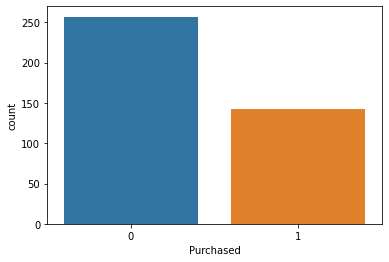

In [5]:
#EDA
sns.countplot(data['Purchased'])
print(data['Purchased'].value_counts())

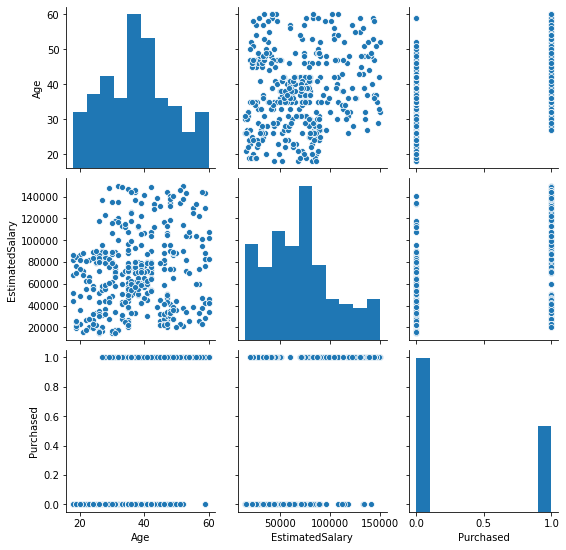

In [6]:
sns.pairplot(data)

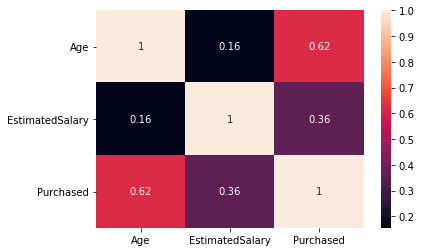

In [7]:
sns.heatmap(data.corr(), annot=True)

In [8]:
#Data Preparation
X = data.iloc[:,[0,1]]
y = data.iloc[:,[-1]]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=4)

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [11]:
#Model building and training
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [12]:
#Model testing
y_preds = lr.predict(X_test)

In [13]:
#Model evaluation
from sklearn.metrics import precision_score, recall_score , confusion_matrix, accuracy_score

print("Accuracy score:", accuracy_score(y_test, y_preds)*100)
print("Precision:", round(precision_score(y_test,y_preds, zero_division=1),2))
print("Recall:", round(recall_score(y_test,y_preds),2))

tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()

print("Type 1 Error rate:", round(fp/(tp+fp+fn+tn),2))
print("Type 2 Error rate:", round(fn/(tp+fp+fn+tn),2))

print("TP =",tp,"FP =",fp,"TN =",tn,"FN =",fn)

Accuracy score: 87.0
Precision: 0.81
Recall: 0.73
Type 1 Error rate: 0.05
Type 2 Error rate: 0.08
TP = 22 FP = 5 TN = 65 FN = 8


In [15]:
confusion_matrix(y_test, y_preds)

array([[65,  5],
       [ 8, 22]], dtype=int64)

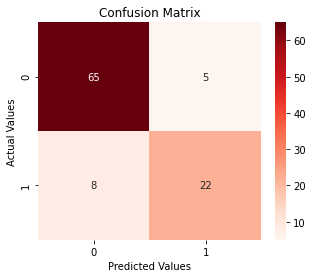

In [16]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True, cmap='Reds')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()